In [3]:
import math, time, random, datetime
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import numpy as np
import pandas as pd
import os
from random import shuffle
import missingno
import matplotlib.pyplot as plt
import warnings
from random import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from skimage import *
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
import cv2

# EDA

In [4]:
train= pd.read_csv(r'petfinder-pawpularity-score/train.csv')

In [5]:
train.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [6]:
#Creating bins for different data sets for training
df_bin=pd.DataFrame()
df_con=pd.DataFrame()

<AxesSubplot:xlabel='count', ylabel='Eyes'>

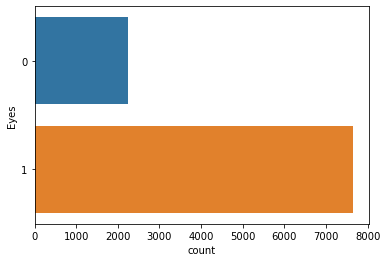

In [7]:
sns.countplot(data=train,y='Eyes')

<AxesSubplot:>

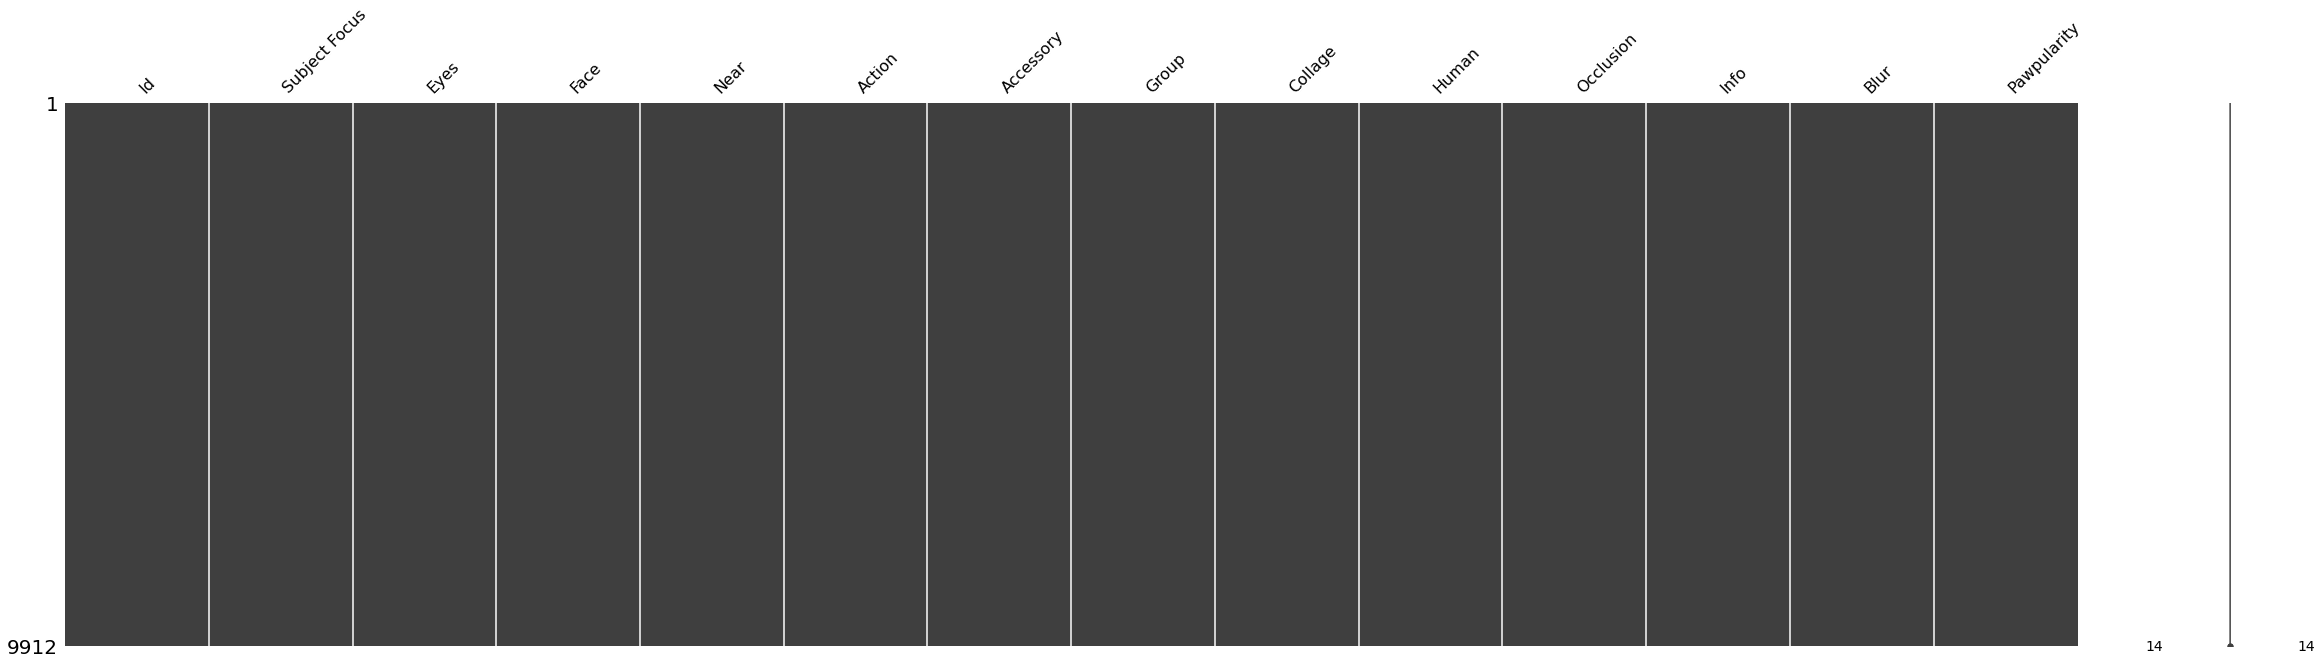

In [8]:
#Checking for missing numbers
missingno.matrix(train, figsize= (40,10))

In [9]:
df_bin['Eyes']=train['Eyes']
df_con['Eyes']=train['Eyes']

<AxesSubplot:xlabel='count', ylabel='Face'>

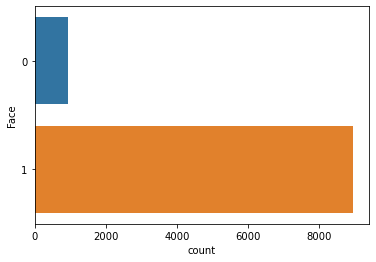

In [10]:
sns.countplot(data=train,y='Face')

In [11]:
df_bin['Face']=train['Face']
df_con['Face']=train['Face']

<AxesSubplot:xlabel='count', ylabel='Near'>

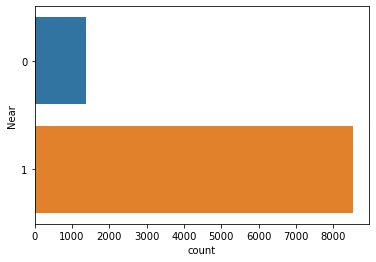

In [12]:
sns.countplot(data=train,y='Near')

In [13]:
df_bin['Near']=train['Near']
df_con['Near']=train['Near']

<AxesSubplot:xlabel='count', ylabel='Face'>

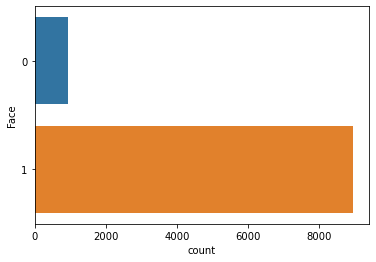

In [14]:
sns.countplot(data=train,y='Face')

<AxesSubplot:xlabel='count', ylabel='Pawpularity'>

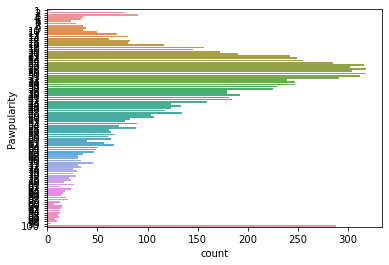

In [15]:
sns.countplot(data=train,y='Pawpularity')

<AxesSubplot:xlabel='Pawpularity', ylabel='Density'>

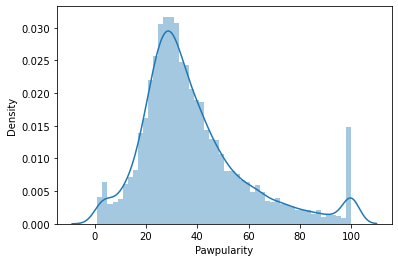

In [16]:
sns.distplot(train.Pawpularity)

In [18]:
#Allows us to combine count and distplots to display side by side
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "eyes"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "no eyes"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "eyes"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "no eyes"});

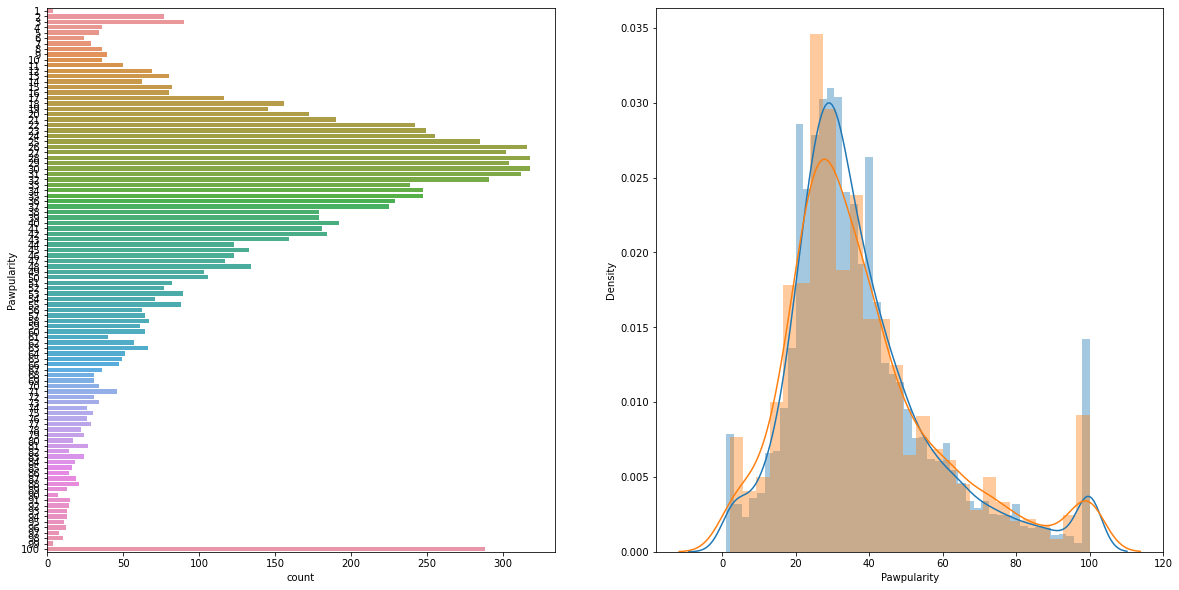

In [19]:
plot_count_dist(train, bin_df=df_bin,label_column='Eyes', target_column='Pawpularity', figsize=(20, 10))

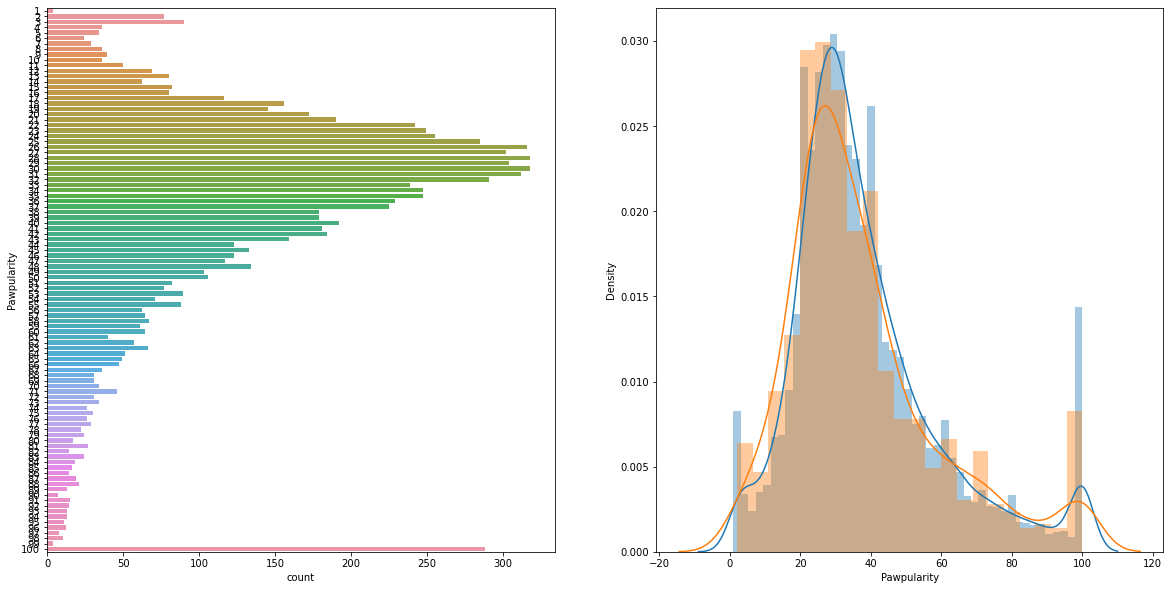

In [20]:
plot_count_dist(train, bin_df=df_bin,label_column='Face', target_column='Pawpularity', figsize=(20, 10))

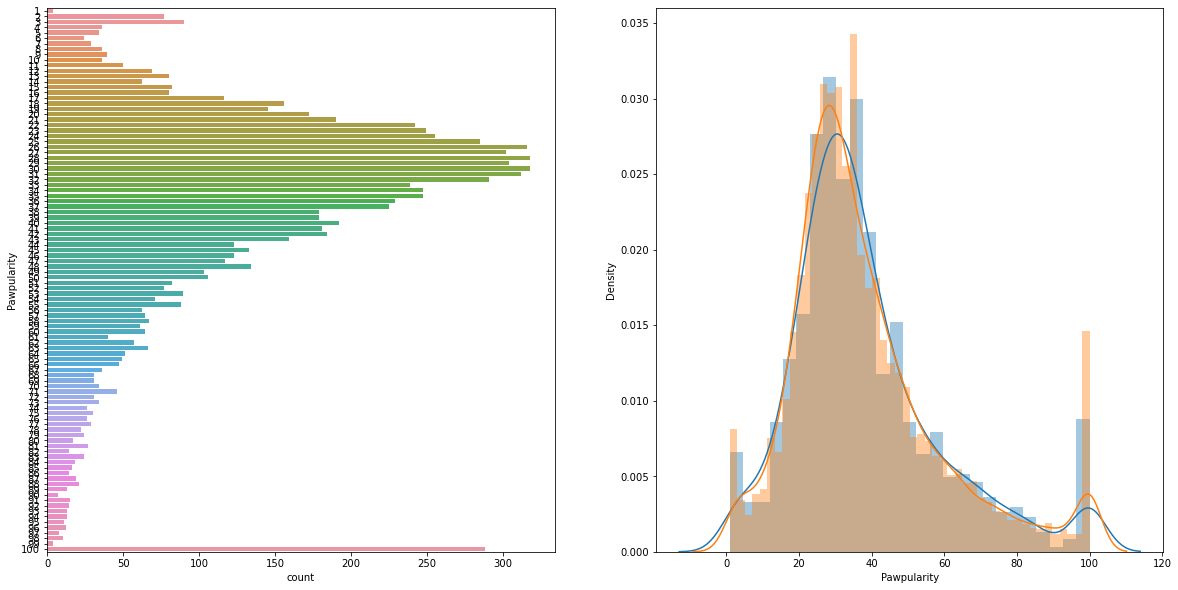

In [21]:
plot_count_dist(train, bin_df=df_bin,label_column='Human', target_column='Pawpularity', figsize=(20, 10))

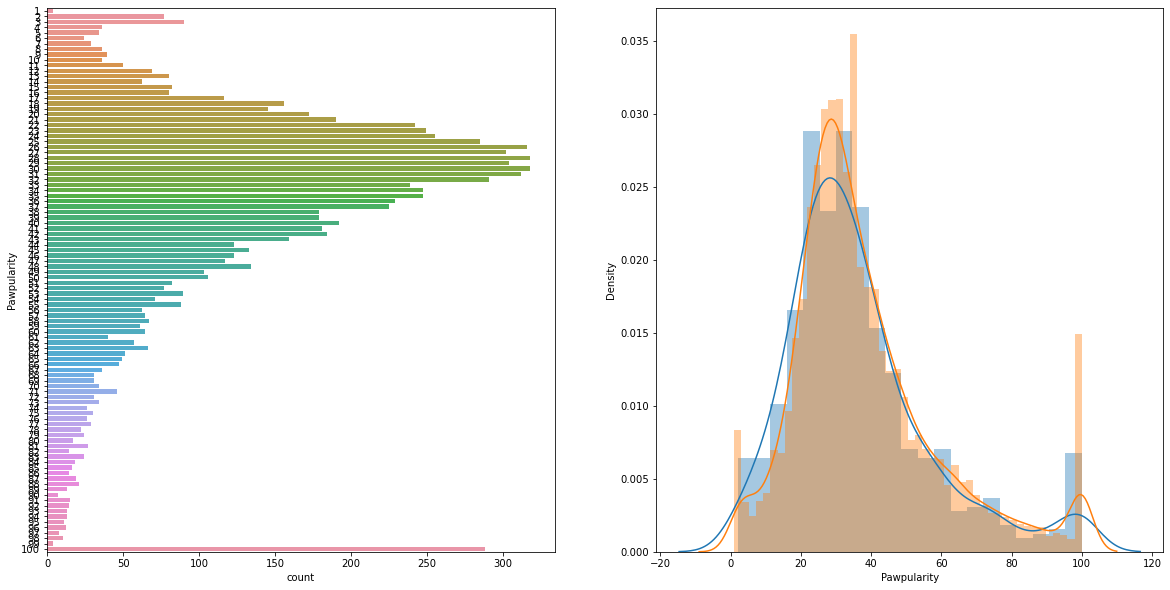

In [22]:
plot_count_dist(train, bin_df=df_bin,label_column='Blur', target_column='Pawpularity', figsize=(20, 10))

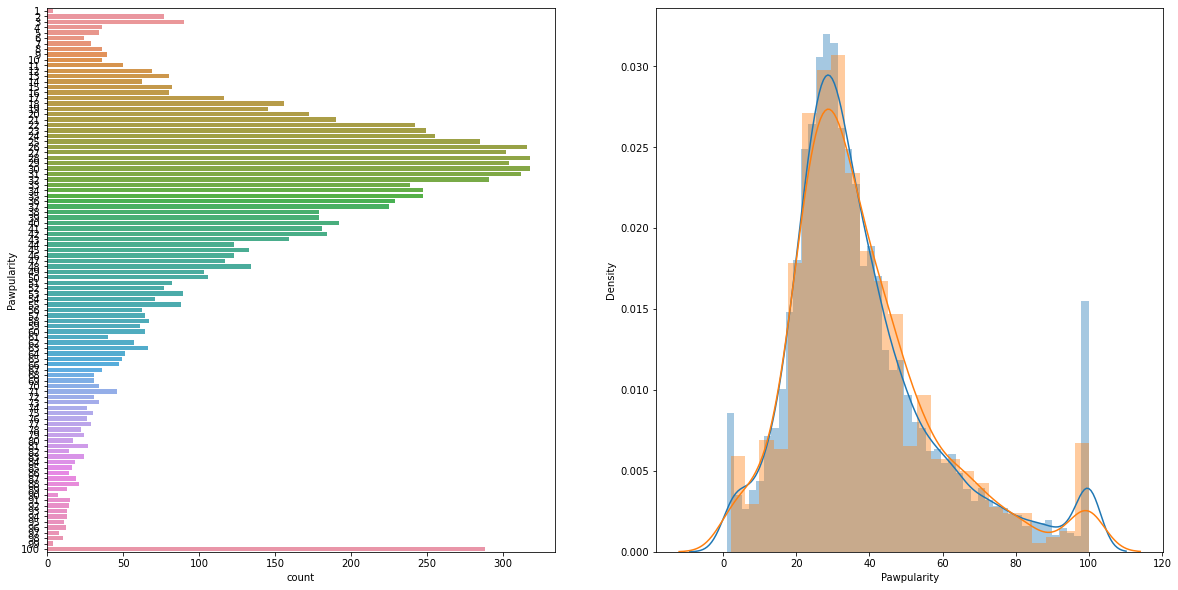

In [23]:
plot_count_dist(train, bin_df=df_bin,label_column='Near', target_column='Pawpularity', figsize=(20, 10))

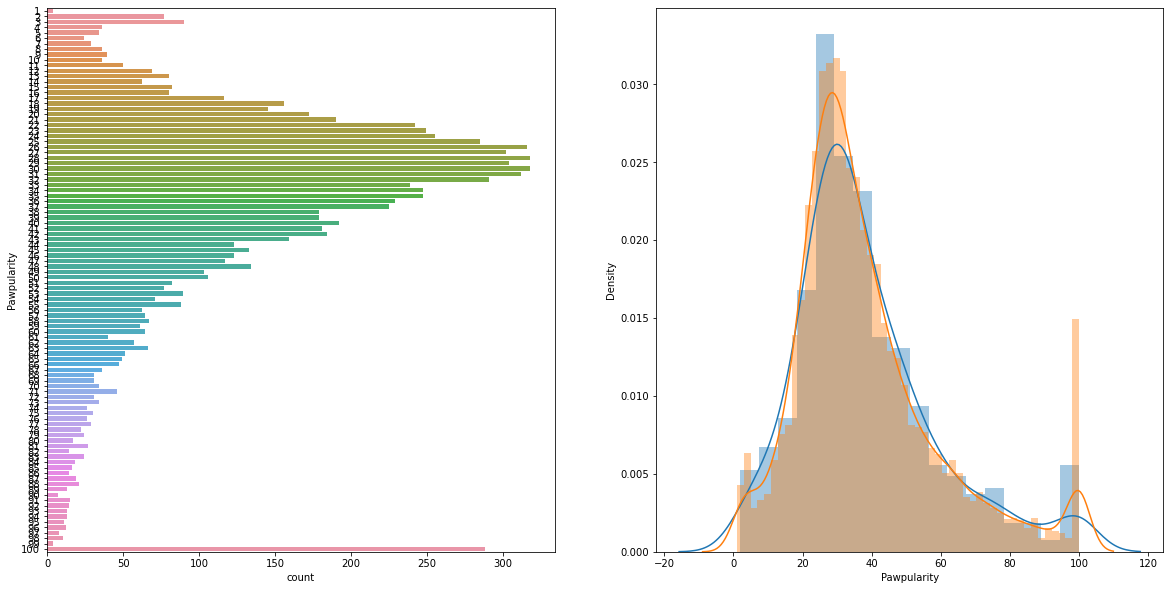

In [24]:
plot_count_dist(train, bin_df=df_bin,label_column='Collage', target_column='Pawpularity', figsize=(20, 10))

# Image Evaluation and Training

In [122]:
path = 'petfinder-pawpularity-score'
IMG_SIZE = 128
NUMCLASSES = 10
#Optional training image metadata
trainfile = path + r'/train.csv'
traindata = pd.read_csv(trainfile)

#Optional testing image metadata
testfile = path + r'/test.csv'
testdata = pd.read_csv(testfile)


ValueError: cannot reshape array of size 2073600 into shape (128,128)

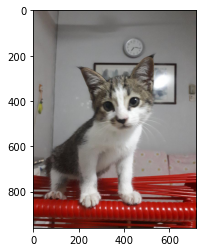

In [128]:
imagelist = os.listdir(path + '/train/')
len(imagelist)
querynum = np.random.randint(len(imagelist)-1)#add the minus 1 to account for thumbs.db
queryimage = io.imread(path + '/train/' + imagelist[querynum])
plt.imshow(queryimage)
queryimage.shape
queryimage.reshape(128, 128)

(128, 128, 3)

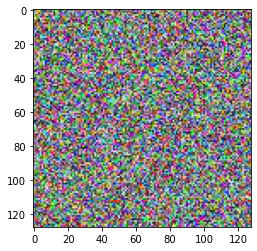

In [124]:
imagelist = os.listdir(path + '/test/')
len(imagelist)
querynum = np.random.randint(len(imagelist)-1)#add the minus 1 to account for thumbs.db
queryimage = io.imread(path + '/test/' + imagelist[querynum])
plt.imshow(queryimage)
queryimage.shape

In [125]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img.reshape(IMG_SIZE, IMG_SIZE)
            images.append(img)
    return images[0]
test = load_images_from_folder(path + "/train/")
test
print(test)
print(test.length())

ValueError: cannot reshape array of size 3279360 into shape (128,128)

In [118]:
print(test[])

27


In [48]:
traindata

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [49]:
testdata

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0
5,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0
6,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1
7,e0de453c1bffc20c22b072b34b54e50f,1,0,1,0,0,0,0,0,1,0,0,1


In [62]:
trainpawp = np.asarray(traindata.Pawpularity)
trainjpgs = np.asarray(traindata)
trainjpgs = traindigits[:,1:]

trainjpgs, valjpgs, trainpawp, valpawp = train_test_split(trainjpgs, trainpawp, test_size=0.2, random_state=42)

print(trainjpgs.shape[0])
trainjpgs[4,:]

7929


array([], dtype=object)

In [114]:
def digit(arr):
    return arr.reshape(IMG_SIZE, IMG_SIZE)

def make_labels(label):
    labels = np.zeros([NUMCLASSES],np.uint8)
    labels[label] = 1
    return labels
    
def train_data_with_label():
    train_images = []
    for i in range(trainjpgs.shape[0]):
        img = digit(trainjpgs[i,:])
        train_images.append([img, make_labels(trainpawp[i])])
    #shuffle(train_images)
    return train_images

def validation_data_with_label():
    validation_images = []
    for i in range(valjpgs.shape[0]):
        img = digit(valjpgs[i,:])
        validation_images.append([img, make_labels(valpawp[i])])
    #shuffle(validation_images)
    return validation_images

In [115]:
training_images = train_data_with_label()
validation_images = validation_data_with_label()

print((np.array(training_images)).shape)
print((np.array(validation_images)).shape)

ValueError: cannot reshape array of size 0 into shape (1280,1280)

# CNN Model

In [20]:
model = Sequential()

model.add(InputLayer(input_shape=[IMG_SIZE,IMG_SIZE,1])) #keras will internally add batch dimension

model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))
model.add(Conv2D(filters=64,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(NUMCLASSES,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 61504)            

In [ ]:
history = model.fit(x=tr_img_data,y=tr_lbl_data,epochs=25,batch_size=700,validation_data=(val_img_data,val_lbl_data),verbose=1)
model.save_weights("mymodel.h5")